<a href="https://colab.research.google.com/github/madol-abraham/Sentimental_Analysis/blob/main/Sentiment_1_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis Task

# Dataset overview and the project

For this assignment, we chose to develop a text

classification system, focusing on Twitter sentiment

 analysis. The goal was to develop a model that can

 accurately classify the sentiment of tweets as either

 positive or negative, which is particularly useful for

 understanding public opinion, monitoring brand reputation,

  or analysing social trends in real time.

The dataset we used is the Sentiment140 dataset, which

contains 1.6 million tweets collected via the Twitter API.

We got this dataset on Kaggle, a popular platform for data

science competitions and datasets (Go et al., 2009).
It includes several key columns:

*target* – the sentiment label (0 for negative, 4 for positive)


ids – a unique identifier for each tweet


date – the timestamp when the tweet was posted


flag – the search query used to collect the tweet (usually marked as "NO_QUERY")


user – the Twitter handle of the person who posted the tweet


text – the actual content of the tweet


This dataset provides a solid foundation for training and

 evaluating sentiment classification models, and it is

 widely used in both academic and industrial settings for

 benchmarking NLP techniques. In this project, we have

 applied text preprocessing, feature engineering, and

  machine learning models to explore how accurately we can
  
   predict tweet sentiment based on the text alone.


## Import the Necessary libraries

In [ ]:
# import all the libraries
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/Machine_learning/training.tweeter.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
660347,0,2242618288,Fri Jun 19 12:25:01 PDT 2009,NO_QUERY,thebeatles14,"ugh shes havent request my twitter thing, and ..."
740152,0,2265917874,Sun Jun 21 07:33:38 PDT 2009,NO_QUERY,bnr0814,I need to figure out how to be strong today......
494514,0,2184945839,Mon Jun 15 16:39:13 PDT 2009,NO_QUERY,justintrann,driving back home Raging Waters was the shit
979501,4,1833938174,Mon May 18 01:00:41 PDT 2009,NO_QUERY,Jazko,Just got a new job at a Pharmacy! Cant wait t...
1104179,4,1971132820,Sat May 30 06:18:24 PDT 2009,NO_QUERY,RickieJacobs,Me and @miss_quan had a wondrful date @ pf cha...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis

In [ ]:
df.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:

print('length of data is', len(df))

length of data is 1600000


In [ ]:
df. shape

(1600000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.dtypes

,0
target,int64
ids,int64
date,object
flag,object
user,object
text,object


In [ ]:
# Check for missing values
print(df.isnull().sum())

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [ ]:
# checking for null values
np.sum(df.isnull().any(axis=1))

np.int64(0)

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [ ]:
df['target'].unique()

array([0, 4])

In [ ]:
df['target'].nunique()

2

# Data Visualization of Target Variables

In [ ]:
df['target'].value_counts()


,count
target,
0,800000
4,800000


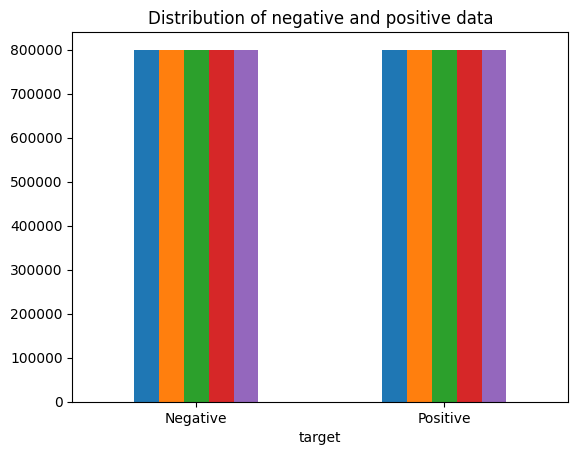

In [ ]:
# Plotting the distribution for dataset.
dx = df.groupby('target').count().plot(kind='bar', title='Distribution of negative and positive data',legend=False)
dx.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

# Key Observation


The bar chart shows an equal distribution between the

Negative and Positive classes,
each with around 800,000 samples.

# Insight

This balanced class distribution is a key advantage for our model training process. It reduces the likelihood of class bias and eliminates the need for resampling techniques. As a result, evaluation metrics like accuracy, precision, and recall can be interpreted with greater confidence, knowing the model is learning from a well-proportioned dataset.



In [ ]:
df.target.value_counts()/len(df)*100

,count
target,
0,50.0
4,50.0


In [ ]:
# length of longest review


<Axes: xlabel='target', ylabel='count'>

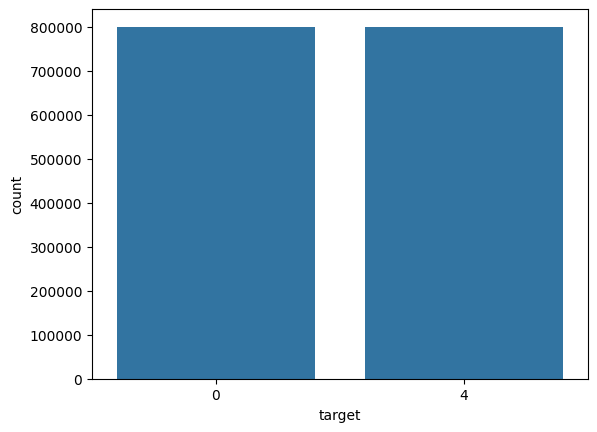

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

# Key Observation

The bar chart displays the distribution of target values in the dataset. Class 0 and class 4 are represented in almost equal proportions, with each class containing approximately 800,000 records.

# Insight


This indicates a well-balanced binary dataset, which is ideal for training classification models. The balanced distribution helps avoid bias toward any class and supports fair model evaluation using standard metrics like accuracy, precision, and recall. It also removes the need for additional techniques such as oversampling or undersampling, streamlining the preprocessing pipeline.

# Data Preprocessing

In [ ]:
data=df[['text','target']]

In [ ]:
data = df[df['target'].isin([0, 4])].copy()
data['target'] = data['target'].replace(4, 1)


In [ ]:
data['target'] = data['target'].replace(4,1)

In [ ]:
data['target'].unique()

array([0, 1])

In [ ]:
# seprating negative and positive tweets
data_positive = data[data['target'] == 1]
data_negative = data[data['target'] == 0]

In [ ]:
data_positive = data_positive.iloc[:int(20000)]
data_negative = data_negative.iloc[:int(20000)]

In [ ]:
# combining negative and positive feed
dataset = pd.concat([data_positive, data_negative])

In [ ]:
# Making statement text in lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

,text
19995,"not much time off this weekend, work trip to m..."
19996,one more day of holidays
19997,feeling so down right now .. i hate you damn h...
19998,"geez,i hv to read the whole book of personalit..."
19999,i threw my sign at donnie and he bent over to ...


In [ ]:
# Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
800000,love @health4uandpets u guys r best!!
800001,im meeting one besties tonight! cant wait!! - ...
800002,"@darealsunisakim thanks twitter add, sunisa! g..."
800003,sick really cheap hurts much eat real food plu...
800004,@lovesbrooklyn2 effect everyone


In [ ]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


In [ ]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


In [ ]:
# Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


In [ ]:
# Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


In [ ]:
# Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

,text
800000,[]
800001,[w]
800002,"[w, w, w]"
800003,[]
800004,[]


In [ ]:
# Applying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
800000,[]
800001,[w]
800002,"[w, w, w]"
800003,[]
800004,[]


In [ ]:
# Download the WordNet corpus
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#  Applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

,text
800000,[]
800001,[w]
800002,"[w, w, w]"
800003,[]
800004,[]


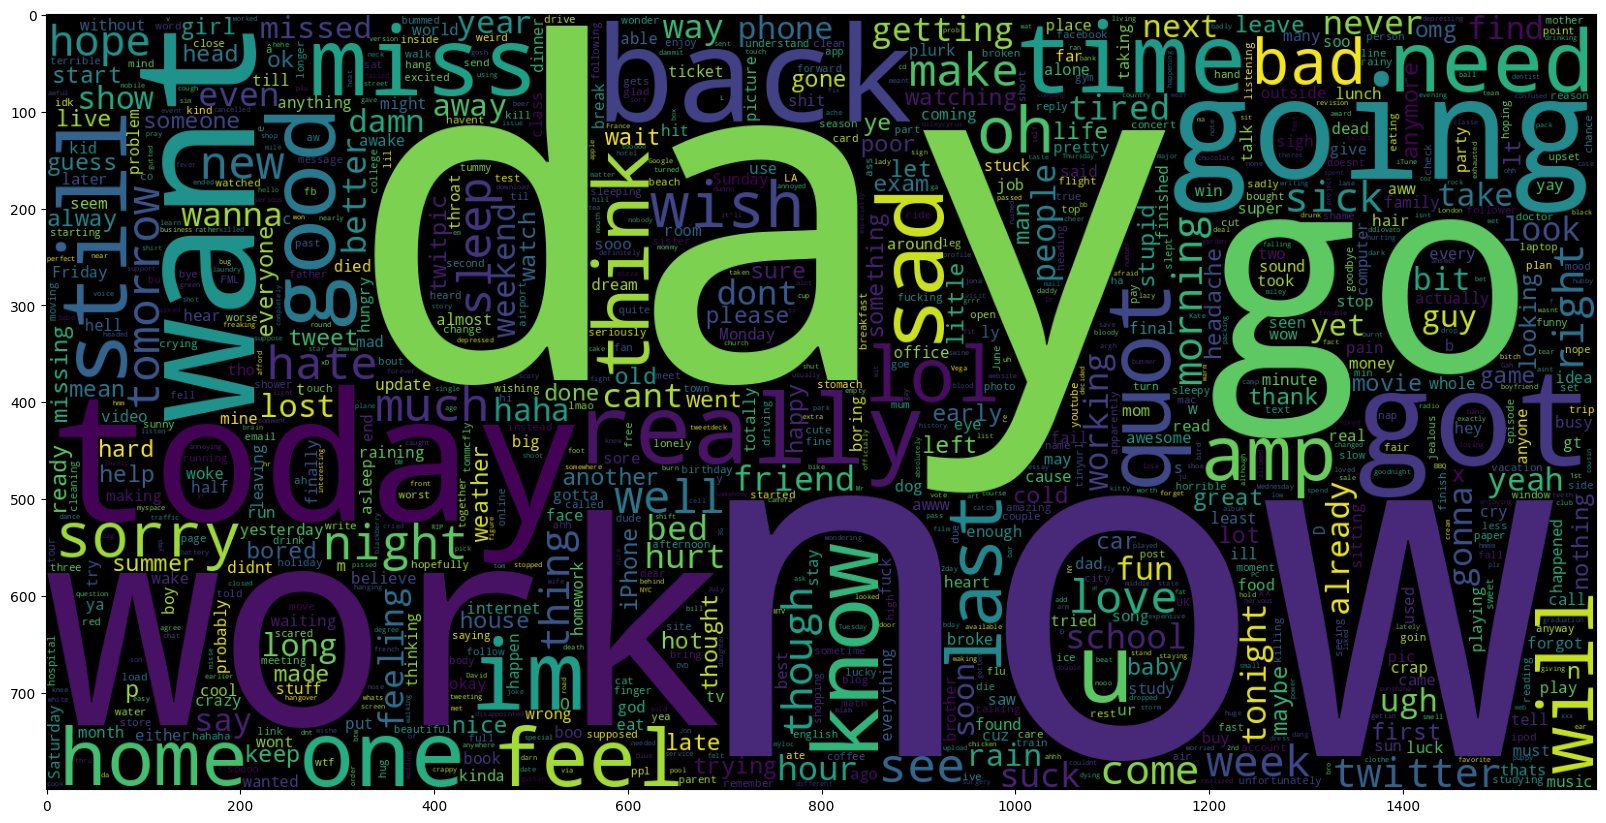

In [ ]:
# Plot a cloud of words for negative tweets
data_negative = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_negative))
plt.imshow(wc)

# Key Observation

The word cloud highlights the most frequently used words in the dataset, with larger words appearing more often in the text data.

# Insight

From the visualization, terms like “day,” “work,” “today,” “go,” “know,” “back,” “miss,” “sad,” and “really” stand out prominently. This suggests a strong focus on daily activities, emotions, and personal experiences, which are common in social sentiment data. Words like "miss," "sad," "sorry," and "hate" imply a significant presence of negative sentiments, whereas terms such as "love," "hope," and "thank" reflect positive tones. These insights confirm the emotional richness and real-world relevance of the data, making it well-suited for training sentiment analysis models.

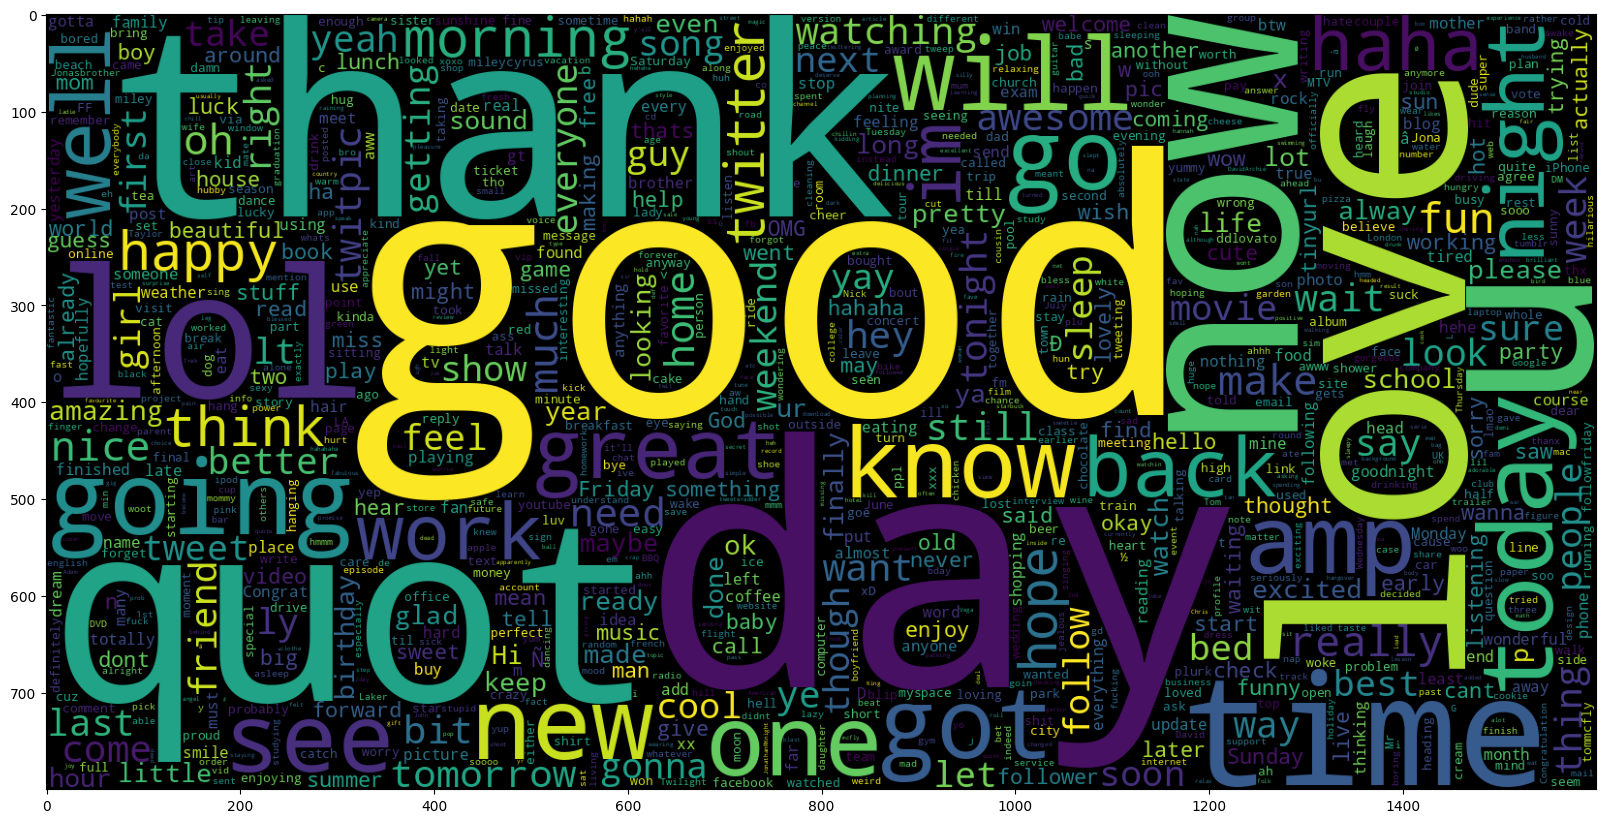

In [ ]:
# Plot a cloud of words for positive tweets
data_positive = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_positive.dropna())) # Added .dropna() to handle missing values
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
#Separating input feature and label
data = data.dropna(subset=['text'])
X=data.text
y=data.target

# Splitting Data Into Train and Test Subsets

In [ ]:
# Separating the 80% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

 Fit the TF-IDF Vectorizer

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))


No. of feature_words:  500000


Transform the data using TF-IDF Vectorizer

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# Model Implementation
two models will be implemented

# Task
Implement, train, and evaluate an LSTM model for text classification, separating the code into cells.

## Prepare data for lstm

### Subtask:
Convert the text data into sequences of integers and pad them to a fixed length.


**Reasoning**:
Import necessary modules and convert text data into sequences of integers using Tokenizer.



**Reasoning**:
The error indicates that the input to the tokenizer is a sparse matrix (csr_matrix) instead of the original text data. This happened because X_train and X_test were transformed by the TfidfVectorizer in a previous step. We need to use the original text data (X and y before the split and vectorization) for the tokenizer.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
# Define vocabulary size
VOCAB_SIZE = 10000

# Use a smaller subset of the data for faster training
subset_size = 100000
X_subset = X.sample(subset_size, random_state=42)
y_subset = y.sample(subset_size, random_state=42)


# Use the original X data for tokenization
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_subset)

# Convert text data to sequences
X_sequences = tokenizer.texts_to_sequences(X_subset)

# Defining maximum sequence length  based on the distribution of tweet lengths)

max_length = max([len(x) for x in X_sequences])
print(f"Maximum sequence length: {max_length}")

# Pad sequences
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# Split the padded data into training and testing sets
X_train_padded, X_test_padded, y_train, y_test = train_test_split(X_padded, y_subset, test_size=0.2, random_state=42)

## Build lstm model

### Subtask:
Design and build an LSTM model using a deep learning framework like TensorFlow or Keras.


**Reasoning**:
Design and build the LSTM model as per the instructions.



In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.models import Sequential

# Define embedding dimension
embedding_dim = 100

# Initialize Sequential model
model = Sequential()

# Add Embedding layer
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=embedding_dim, input_length=max_length))

# Add SpatialDropout1D layer
model.add(SpatialDropout1D(0.2))

# Add LSTM layer
model.add(LSTM(100))

# Add Dense output layer
model.add(Dense(1, activation='sigmoid'))

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile and train lstm model

### Subtask:
Compile the LSTM model and train it on the prepared training data.


**Reasoning**:
Compile and train the LSTM model as per the instructions.



In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 4695s 235ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6931
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 4658s 232ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6931
Epoch 3/5
 3802/20000 ━━━━━━━━━━━━━━━━━━━━ 58:38 217ms/step - accuracy: 0.5004 - loss: 0.6932

# Logistic regression model

Initialize the model for training

In [ ]:
# Initialize model
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1, solver='lbfgs')
LRmodel.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Accuracy: 0.8255875
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82    159494
           1       0.82      0.83      0.83    160506

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000

Confusion Matrix:
 [[130242  29252]
 [ 26560 133946]]


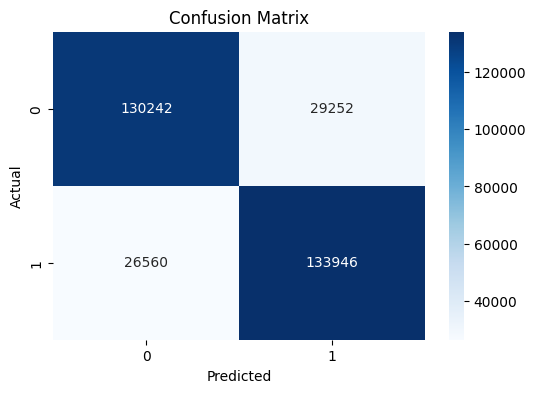

In [ ]:
model_Evaluate(LRmodel)
